In [1]:
import pandas as pd
import spacy
import emoji
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/andy/Documents/DS/TFM SALLE/project/Ibai/Ibai_videos.csv')
df = df[df['transcript'] != 'Subtitle not available']
df['transcript'] = df['transcript'].str.replace('\xa0__\xa0', 'xxxx')

In [3]:
print(df.isnull().sum())

video_id        0
title           0
description     0
publish_date    0
likes           0
views           0
comments        0
transcript      0
dtype: int64


In [4]:
# Load Spanish tokenizer, POS tagger, parser, NER and word vectors
nlp = spacy.load('es_core_news_sm')

def preprocess(text):
    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stop words, and lemmatize using SpaCy's Spanish model
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return tokens


In [5]:
%%time

# Apply preprocessing to each column
df['title'] = df['title'].apply(preprocess)
df['description'] = df['description'].apply(preprocess)
df['transcript'] = df['transcript'].apply(preprocess)

CPU times: user 2min 35s, sys: 8.07 s, total: 2min 43s
Wall time: 3min 1s


In [6]:
# Save the DataFrame as CSV
df.to_csv('preprocessed_data.csv', index=False)

In [7]:
# Title
# Word frequency analysis
title_tokens = [token for title in df['title'] for token in title]

# Count the occurrences of each token
word_freq = Counter(title_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('reaccionar', 58), ('vs', 37), ('reír', 32), ('fc', 29), ('porcino', 27), ('kings', 23), ('leagar', 22), ('dar', 19), ('pierd', 17), ('año', 16), ('cara', 16), ('velada', 16), ('among', 15), ('hacer', 14), ('kun', 12)]
          Word  Frequency
0   reaccionar         58
1           vs         37
2         reír         32
3           fc         29
4      porcino         27
5        kings         23
6       leagar         22
7          dar         19
8        pierd         17
9          año         16
10        cara         16
11      velada         16
12       among         15
13       hacer         14
14         kun         12


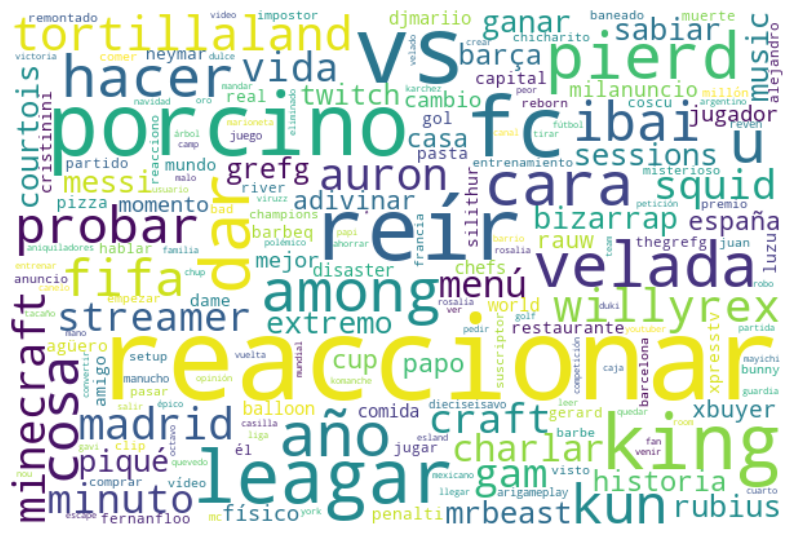

In [8]:

title_words = ' '.join([' '.join(doc) for doc in df['title']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(title_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("title_wordcloud.png")

plt.show()


In [9]:
# Description
# Word frequency analysis
description_tokens = [token for description in df['description'] for token in description]

# Count the occurrences of each token
word_freq = Counter(description_tokens)

# Display the 15 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('canal', 618), ('twitter', 333), ('instagram', 331), ('discord', 329), ('twitch', 328), ('contacto', 326), ('podcast', 293), ('tik', 292), ('tok', 292), ('extraído', 285), ('editor', 285), ('reddit', 251), ('ibaikoisquadcom', 228), ('ibaivizzagencycom', 98), ('ronda', 71)]
                 Word  Frequency
0               canal        618
1             twitter        333
2           instagram        331
3             discord        329
4              twitch        328
5            contacto        326
6             podcast        293
7                 tik        292
8                 tok        292
9            extraído        285
10             editor        285
11             reddit        251
12    ibaikoisquadcom        228
13  ibaivizzagencycom         98
14              ronda         71


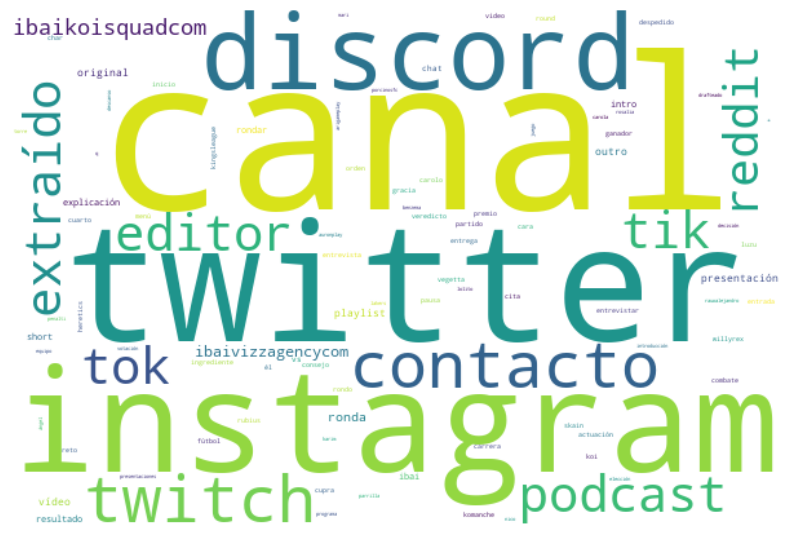

In [10]:

description_words = ' '.join([' '.join(doc) for doc in df['description']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(description_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("description_wordcloud.png")

plt.show()
